In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

#get working directory
cwd = os.getcwd()
cwd

#run multiple commands per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#read in csv file into the google collab
#from google.colab import files
#uploaded = files.upload()
#vg = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))
#vg.head()

#version for juptyer notebook thru anaconda
vg = pd.read_csv('C:\\Users\\XBBN0LD\\Contacts\\Python\\vgsales.csv')

In [5]:
print(vg.info())
print(vg.shape)
print(vg.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [6]:
#Going to clean data and convert year so there are no decimal points

#get shape of vg dataframe
vg.shape

#get the number of null values in column Year
vg.Year.isnull().sum()

#Can do this instead of dropping na values, can just keep finite values
#vg = vg[np.isfinite(vg['Year'])]

#drop null values from whole dataframe
vg = vg.dropna()

#convert year column to int so it eliminates the decimal points: was 2005.0 but now is 2005
vg['Year'] = vg["Year"].astype(int)
#confirm the change in datatype
vg.dtypes
#see new dataframe
vg.head()


(16598, 11)

271

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'North American Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'European Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Japan Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Other Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Global Sales')

Text(0, 0.5, '$ (Millions)')

Text(0.5, 0.98, '')

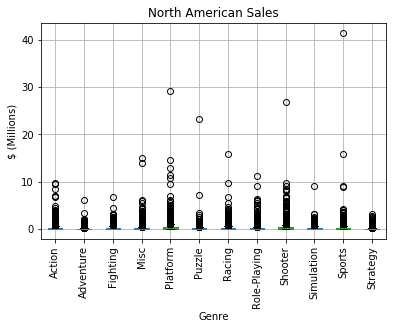

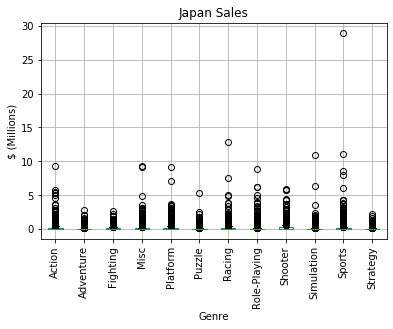

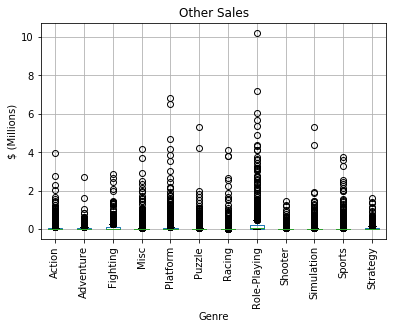

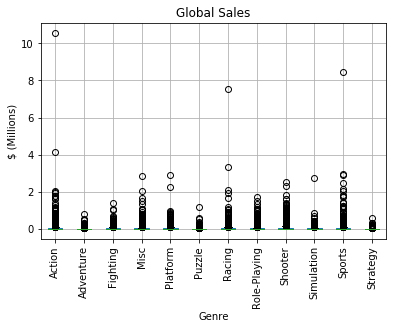

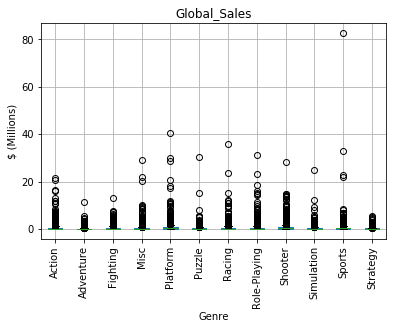

In [12]:
#Boxplot depicting range of the sales of video games by genre and by region
vg.boxplot(column='NA_Sales', by='Genre', rot=90)
# the suptitle('') lines here hide extra line that says "grouped by genre"
# I added this line because it wasn't printing the boxplots nicely 
plt.title("North American Sales")
plt.ylabel('$ (Millions)')
plt.suptitle('')

vg.boxplot(column='EU_Sales', by='Genre', rot=90)
plt.title("European Sales")
plt.ylabel('$ (Millions)')
plt.suptitle('')


plt.title("Japan Sales")
vg.boxplot(column='JP_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')

plt.title("Other Sales")
vg.boxplot(column='Other_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')

plt.title("Global Sales")
vg.boxplot(column='Global_Sales', by='Genre', rot=90)
plt.ylabel('$ (Millions)')
plt.suptitle('')


count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64


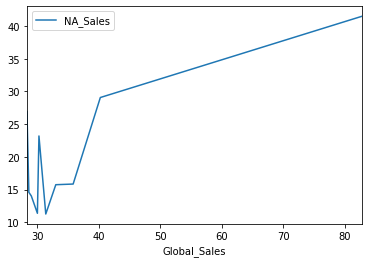

In [13]:
print(vg['Global_Sales'].describe())
vg1 = vg.iloc[0:10].plot(y='NA_Sales', x='Global_Sales')
plt.show()


In [14]:
##Seaborn tutorial https://www.kaggle.com/paragondefender/seaborn-tutorial

import seaborn as sns
sns.set(style="darkgrid")

from collections import Counter
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


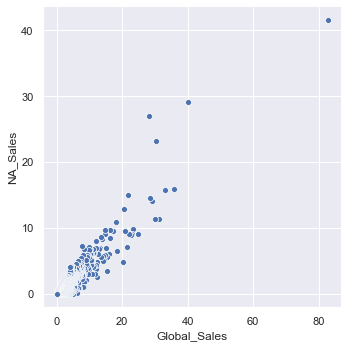

In [15]:
#Scatterplot global sales against na sales
sns.relplot(x="Global_Sales",y="NA_Sales",data=vg,height=5)

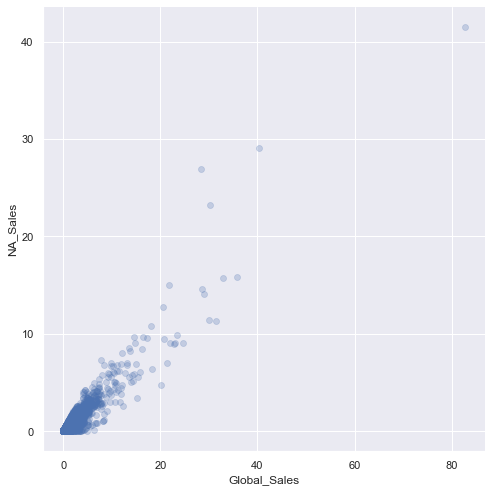

In [16]:
sns.relplot(x="Global_Sales", y="NA_Sales",data=vg,height=7, alpha=0.25, edgecolor=None)

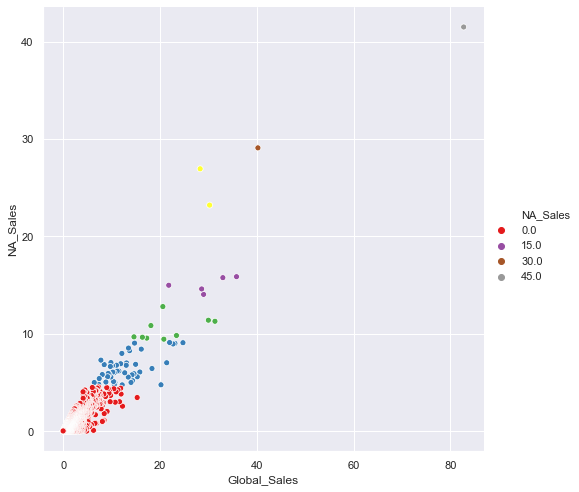

In [17]:
sns.relplot(
            x="Global_Sales",
            y="NA_Sales",
            hue="NA_Sales", # added to color axis
            data=vg,
            height=7,
            palette="Set1", # change color palette 
            edgeColor=None)

In [18]:
sns.relplot(
            x="NA_Sales",
            y="Global_Sales",
            hue="NA_Sales",
            size="depth",   ###
            style="color",  ###
            data=vg,
            palette="CMRmap_r",
            edgecolor=None,
            height=7)

ValueError: Could not interpret input 'depth'

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Most common 20 of Platform')

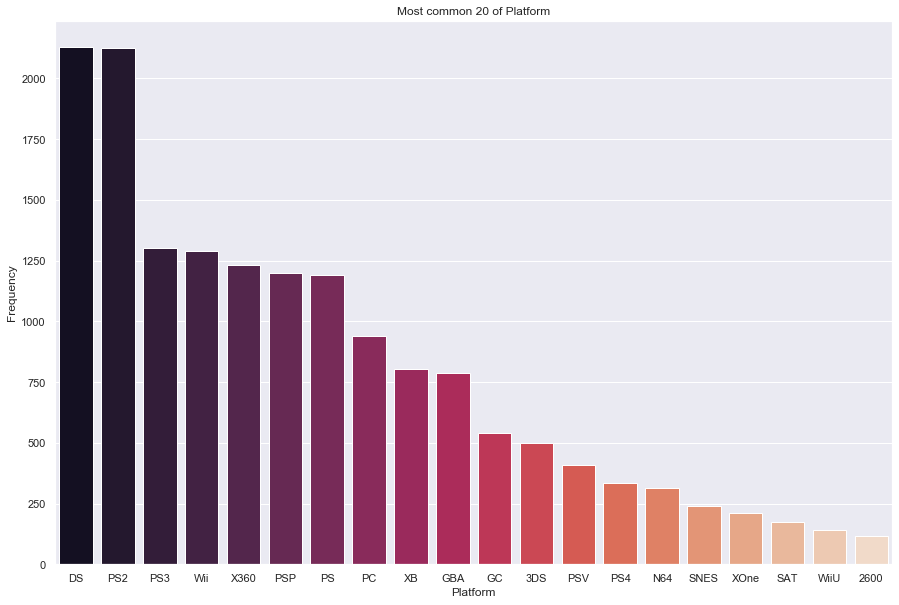

In [19]:
platform_count = Counter(vg.Platform)
most_platform=platform_count.most_common(20)
platform_name,count = zip(*most_platform)
platform_name,count = list(platform_name),list(count)

# visualization

plt.figure(figsize=(15,10))
ax=sns.barplot( x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most common 20 of Platform')
plt.show()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

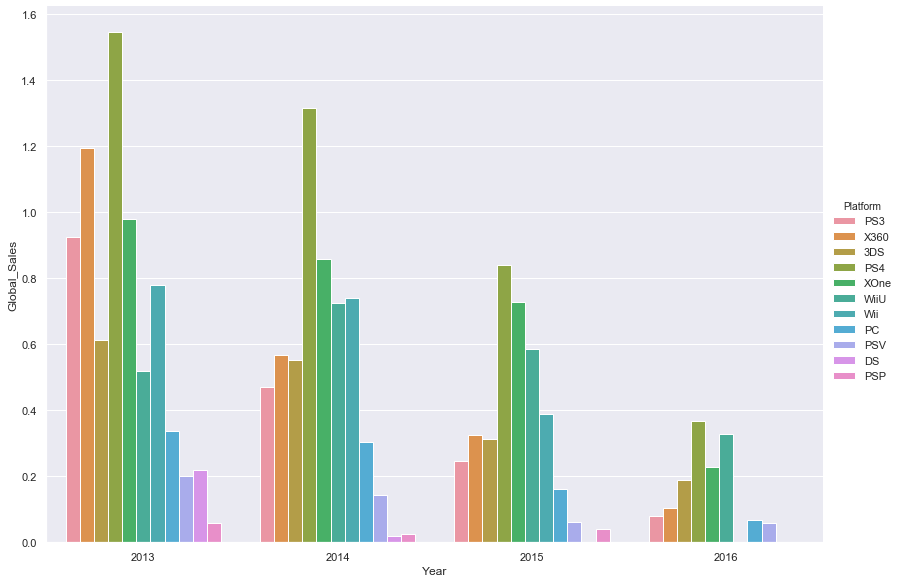

In [20]:
first_filter=vg.Year>2012
second_filter=vg.Year<2017
new_vg=vg[first_filter&second_filter]

plt.figure(figsize=(15,10))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=new_vg,
            edgecolor=None,
            height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

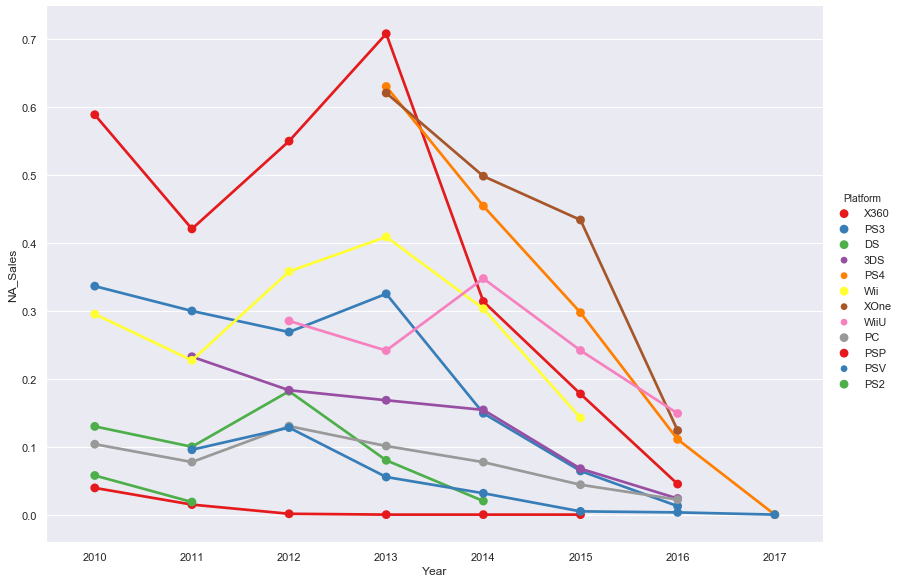

In [21]:
#2010-2017
first_filter=vg.Year>2009
second_filter=vg.Year<2018
vg1=vg[first_filter&second_filter]


#visualization

sns.catplot(x="Year",y="NA_Sales",kind="point",
            data=vg1,
            hue = "Platform",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8.27, 
            aspect=11.7/8.27)
plt.show()

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Values')

Text(5.7, 240, 'Action')

Text(5.7, 230, 'Shooter')

Text(5.7, 220, 'Sports')

Text(5.7, 210, 'Role-Playing')

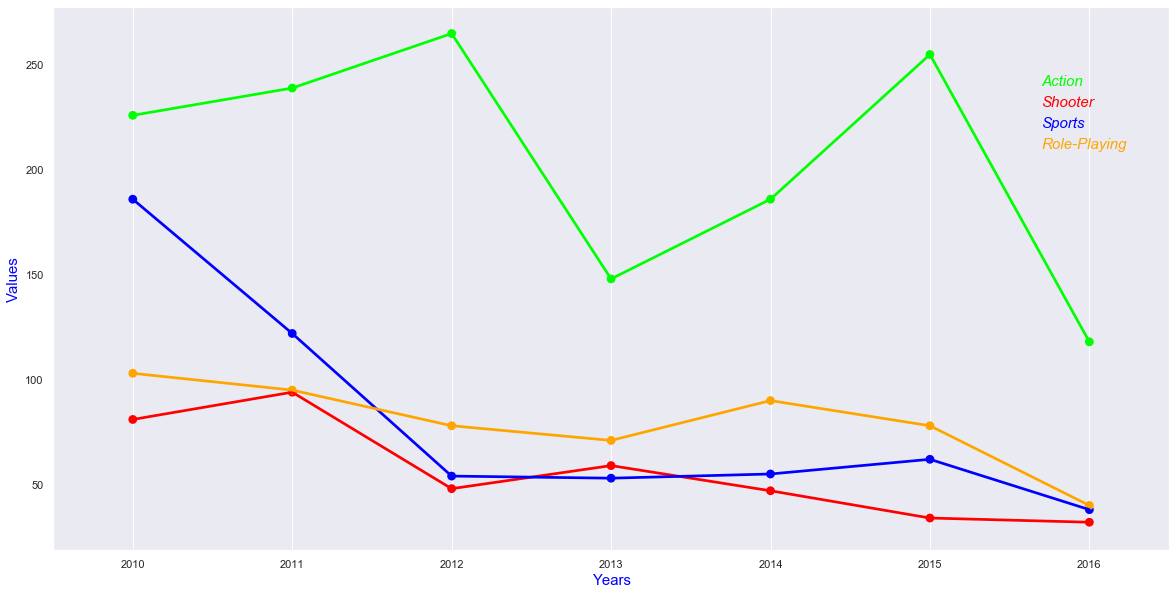

In [22]:
#creating a subset df with year, genre and global sales
data1=vg[['Year','Genre','Global_Sales']]
#set_index function sets the variable year as the index which enables easier subsetting for time series
data1=vg.set_index('Year')
#create empty list for 2010 data
data2010=[]
# append 2010 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2010].Genre=='Shooter'),sum(data1.loc[2010].Genre=='Sports'), sum(data1.loc[2010].Genre=='Action'),sum(data1.loc[2010].Genre=='Role-Playing')])
# append 2011 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2011].Genre=='Shooter'),sum(data1.loc[2011].Genre=='Sports'), sum(data1.loc[2011].Genre=='Action'),sum(data1.loc[2011].Genre=='Role-Playing')])
# append 2012 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2012].Genre=='Shooter'),sum(data1.loc[2012].Genre=='Sports'), sum(data1.loc[2012].Genre=='Action'),sum(data1.loc[2012].Genre=='Role-Playing')])
# append 2013 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2013].Genre=='Shooter'),sum(data1.loc[2013].Genre=='Sports'), sum(data1.loc[2013].Genre=='Action'),sum(data1.loc[2013].Genre=='Role-Playing')])
# append 2014 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2014].Genre=='Shooter'),sum(data1.loc[2014].Genre=='Sports'), sum(data1.loc[2014].Genre=='Action'),sum(data1.loc[2014].Genre=='Role-Playing')])
# append 2015 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2015].Genre=='Shooter'),sum(data1.loc[2015].Genre=='Sports'), sum(data1.loc[2015].Genre=='Action'),sum(data1.loc[2015].Genre=='Role-Playing')])
# append 2016 data for the 4 genres to the data2010 list
data2010.append([sum(data1.loc[2016].Genre=='Shooter'),sum(data1.loc[2016].Genre=='Sports'), sum(data1.loc[2016].Genre=='Action'),sum(data1.loc[2016].Genre=='Role-Playing')])

#create dataframe with the subsetted data with the 4 genres
df=pd.DataFrame(data2010,columns = ['Shooter' , 'Sports', 'Action','Role-Playing'])
#set the years of the dataframe from 2010-2016
df['Year']=[2010,2011,2012,2013,2014,2015,2016]

#visual

f,ax1 = plt.subplots(figsize =(20,10))

#line plot for year and the action genre and set color to lime
sns.pointplot(x='Year',y='Action',data=df,color='lime',alpha=0.7)
#line plot for year and the shooter genre and set color to red
sns.pointplot(x='Year',y='Shooter',data=df,color='red',alpha=0.7)
#line plot for year and the sports genre and set color to blue
sns.pointplot(x='Year',y='Sports',data=df,color='blue',alpha=0.7)
#line plot for year and the role-playing genre and set color to orange
sns.pointplot(x='Year',y='Role-Playing',data=df,color='orange',alpha=0.7)

#make x label look nice with blue color 
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.text(5.7,240,'Action',color='lime',fontsize = 15,style = 'italic')
plt.text(5.7,230,'Shooter',color='red',fontsize = 15,style = 'italic')
plt.text(5.7,220,'Sports',color='blue',fontsize = 15,style = 'italic')
plt.text(5.7,210,'Role-Playing',color='orange',fontsize = 15,style = 'italic')
plt.grid()

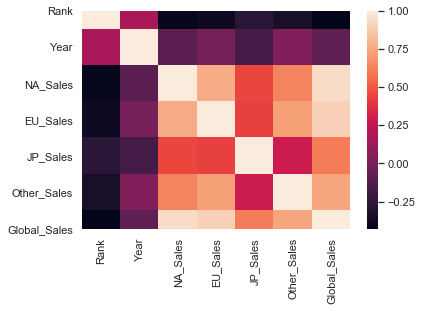

In [23]:
import seaborn as sns
vg1 = vg.corr()
sns.heatmap(vg1, 
            xticklabels=vg1.columns.values,
            yticklabels=vg1.columns.values
)


In [24]:
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [119]:
#read in csv file into the google collab
from google.colab import files
uploaded = files.upload()
sal = pd.read_csv(io.BytesIO(uploaded['Sal.csv']))
sal.head()

Saving Sal.csv to Sal (1).csv


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"101,442.00",NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"94,122.00",NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,"111,024.00",NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"114,780.00",NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,43.72


The goal of this analysis is to see the dispersion of salaries of public employees

In [121]:
sal.info()
sal.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33586 entries, 0 to 33585
Data columns (total 8 columns):
Name                 33586 non-null object
Job Titles           33586 non-null object
Department           33586 non-null object
Full or Part-Time    33586 non-null object
Salary or Hourly     33586 non-null object
Typical Hours        7948 non-null float64
Annual Salary        25638 non-null object
Hourly Rate          7948 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.1+ MB


(33586, 8)

In [0]:
##Going to clean data and convert Rank to int so there are no decimal points
#Also need to remove Part time employees as well

#In order to do so, going to need to clean data and remove spaces and add _'s
df = sal.rename(columns={'Job Titles': 'Job_Titles', 'Full or Part-Time': 'FT_or_PT', 'Salary or Hourly': 'Sal_or_Hr', 'Typical Hours': 'Typical_Hours', 'Annual Salary': 'Annual_Salary', 'Hourly Rate': 'Hourly_Rate'})


In [130]:
df.head()

,Name,Job_Titles,Department,FT_or_PT,Sal_or_Hr,Typical_Hours,Annual_Salary,Hourly_Rate,Rank
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"101,442.00",NaN,695.5
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"94,122.00",NaN,22954.5
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,"111,024.00",NaN,2984.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"114,780.00",NaN,3733.0
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,43.72,NaN


In [0]:
#Create new dataframe of the salaries
df = pd.DataFrame(sal)

#Add the rank of annual salary into a separate column
df["Rank"] = df["Annual Salary"].rank()

In [136]:
#Going to clean data and convert Rank to int so there are no decimal points
#Also need to remove Part time employees as well

#get the number of null values in column Year
df.Annual_Salary.isnull().sum()

#Can do this instead of dropping null values for salaries
df1 = df[pd.notnull(df['Annual_Salary'])]

#drop null values from whole dataframe
#df1 = df.dropna()


7948

In [137]:
#dropped around 10-11k employees since they were part time
df1.shape
df1.head()

(25638, 9)

,Name,Job_Titles,Department,FT_or_PT,Sal_or_Hr,Typical_Hours,Annual_Salary,Hourly_Rate,Rank
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"101,442.00",NaN,695.5
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"94,122.00",NaN,22954.5
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,"111,024.00",NaN,2984.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"114,780.00",NaN,3733.0
5,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,"48,078.00",NaN,6674.0


In [144]:
#Lets do a check to see if all remaining 
(df1[FT_or_PT]=='F').sum()
(df1[FT_or_PT]=='T').sum()

NameError: ignored

In [157]:
#Check out df1 shape and see that there are 25,638 observations
df1.shape
#printing the number of rows with Full time salaries
print(df1[df1.FT_or_PT == 'F'].count())
#Can see there are two extra observations that are fulltime. We deleted all null values of annuual salary.
#Lets see if those extra observations are bc there are null values in F or P category
#get number of null values in FT_or_PT
df1.FT_or_PT.isnull().sum()
# lets abadon this idea and move forward with analysis

(25638, 9)

Name             25636
Job_Titles       25636
Department       25636
FT_or_PT         25636
Sal_or_Hr        25636
Typical_Hours        0
Annual_Salary    25636
Hourly_Rate          0
Rank             25636
dtype: int64


0

In [158]:
df1.head()

,Name,Job_Titles,Department,FT_or_PT,Sal_or_Hr,Typical_Hours,Annual_Salary,Hourly_Rate,Rank
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,"101,442.00",NaN,695.5
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,"94,122.00",NaN,22954.5
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,"111,024.00",NaN,2984.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,"114,780.00",NaN,3733.0
5,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,"48,078.00",NaN,6674.0


In [0]:
https://towardsdatascience.com/modin-accelerating-your-pandas-functions-by-changing-one-line-of-code-504c39b5ddbc?
#come back and get the top 10 salaries, mean, median, st.dev
# make some visualizations with this as well, etc.

In [0]:
#THis is one way of looking at this dataframe. For the next attempt,  I should clean up the dataset by melting/concatenating/ and 
#creating new variables. The Annual_Salary/ Sal_or_Hr / Typical_Hours, Hourly_Rate columns are messy and all rely on the FT_or_PT column